## HomeWork 1 Due at Mid-night 2/26/2020

### This homework will cover the following skills set
* Using sql 
* Checking for null values and outliers
* Calculate simple statistics using both SQL and Pandas 
* Calculate skew and correlation
* Basic Data Visualization
* How to fix missing values

## Late Policy: Take off 50% after one day, 80% after two days

**Make sure you have pandasql installed. If not, make sure you run the code in the following cell**

In [196]:
import os
try:
    import pandasql as ps
except:
    print("Failed in import pandasql")
    os.system("pip install pandasql")

**Import all standard libaries**

In [197]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Car Crashes dataset Number 2 ##

In [198]:
crash = pd.read_csv("car_crashes2.csv")
print(crash.shape)
crash.head()

(52, 10)


,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,South,East South Central
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,West,Pacific
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,West,Mountain
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,South,West South Central
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,West,Pacific


* accidents is the total number of crashes for each state
* speeding is the average speeding in each state

In [199]:
crash.region.unique()

array(['South', 'West', 'Northeast', 'Midwest', 'Territory'], dtype=object)

In [200]:
crash.division.unique()

array(['East South Central', 'Pacific', 'Mountain', 'West South Central',
       'New England', 'South Atlantic', 'East North Central',
       'West North Central', 'Middle Atlantic', 'Territory'], dtype=object)

## Question 1. Check if there are any null or NA

**Type in your code here**

In [201]:
print(crash.isnull().any())
crash[crash.isnull().any(axis=1)]

accidents         False
speeding           True
alcohol           False
not_distracted    False
no_previous       False
ins_premium       False
ins_losses        False
state             False
region            False
division          False
dtype: bool


,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
32,12.3,NaN,3.567,10.824,9.84,1234.31,150.01,NY,Northeast,Middle Atlantic


## Question 2. Remove any rows that has null or NA

**Type in your code here**

In [202]:
crash.dropna(inplace=True)
print(len(crash))
crash.isnull().any()

51


accidents         False
speeding          False
alcohol           False
not_distracted    False
no_previous       False
ins_premium       False
ins_losses        False
state             False
region            False
division          False
dtype: bool

## Question 3. Check if there is any outliers in the alcohol field using both scatter and boxplot

**Type in your code here**

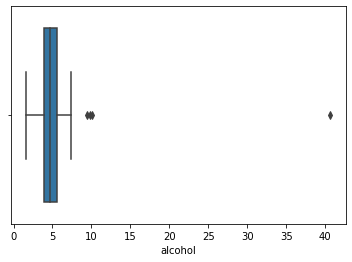

In [203]:
sns.boxplot(crash['alcohol'])

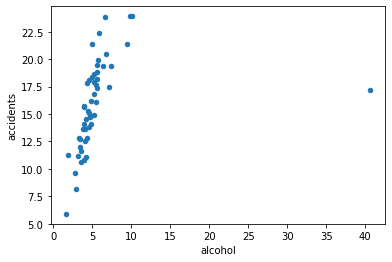

In [204]:
crash.plot.scatter(x='alcohol', y='accidents')

## Question 4. Display and then Remove the one outlier row. You should now have 50 rows

**Type in your code here**

In [205]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.84)
    iqr = q3-q1 
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    rows = df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
    df_out = df_in.loc[(df_in[col_name] >= fence_low) & (df_in[col_name] <= fence_high)]
    return df_out, rows

In [206]:
crash, rows = remove_outlier(crash, 'alcohol')
rows.head()

,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
39,17.2,7.1,40.642,17.472,16.016,905.99,153.86,PR,Territory,Territory


## Question 5. Calculate the average speeding in usa and Northeast region using SQL

**Type in your code here**

In [207]:
query1 = 'SELECT AVG(speeding) FROM crash'
print('Average Speed in USA:')
print(ps.sqldf(query1))
query2 = "SELECT AVG(speeding) FROM crash WHERE region = 'Northeast'"
print('Average Speed in Northeast:')
print(ps.sqldf(query2))

Average Speed in USA:
   AVG(speeding)
0        5.01944
Average Speed in Northeast:
   AVG(speeding)
0        4.42475


## Question 6. Calculate the average alcohol for each region using SQL

**Type in your code here**

In [211]:
print('All The Region: ',crash.region.unique())
query3 = 'SELECT region, AVG(alcohol) FROM crash group by region'
print(ps.sqldf(query3))

All The Region:  ['South' 'West' 'Northeast' 'Midwest']
      region  AVG(alcohol)
0    Midwest      4.996917
1  Northeast      3.980500
2      South      5.414647
3       West      4.754077


## Question 7. Calculate the number of occurrences, mean, min, max of the speeding for each divison using SQL

**Type in your code here**

In [221]:
query4 = 'SELECT division, COUNT(*),AVG(speeding), MAX(speeding), MIN(speeding) FROM crash GROUP BY division'
print(ps.sqldf(query4))

             division  COUNT(*)  AVG(speeding)  MAX(speeding)  MIN(speeding)
0  East North Central         5       4.106600          4.968          3.384
1  East South Central         4       4.533250          7.332          2.640
2     Middle Atlantic         2       5.446000          9.100          1.792
3            Mountain         8       5.812250          8.346          3.496
4         New England         6       4.084333          5.738          1.886
5             Pacific         5       5.949400          9.450          4.200
6      South Atlantic         9       5.030444          9.082          2.006
7  West North Central         7       4.293429          6.923          1.937
8  West South Central         4       6.333750          7.760          4.032


## Question 8. Answer Question 7 but use Pandas functions

**Type in your code here**

## Question 9. Calculate the Standard deviation, Skew and Kurtosis for the accidents, speeding, alcohol for each region

**Type in your code here**

## Question 10. Plot the histogram of accidents distribution for different region using 5 bins

**Type in your answer here**

## Question 11. How would you describe the accidents distribution for different region based on the Skew and Kurotsis?
(i.e. who has positive and negative skew and who has positive and negative Kurotsis)

**Type in your answer here**

## Question 12. Calculate correlation of all the factors among themselves and determine which factors among speeding, alcohol and ins_premium will affect accidents the most?

**Type in your code here**

### Now Load a different dataset (MPG dataset number 3)

In [121]:
mpg = pd.read_csv("mpg3.csv")
print(mpg.shape)
mpg.head()

(405, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,usa,ford torino


## Question 13: Check to see if there are any missing values. Fix the missing values by imputing value from the mean.

In [123]:
print(mpg.isnull().any())
print("\n")
print("Yes, there are missing values in mpg, horsepower, weight")

mpg              True
cylinders       False
displacement    False
horsepower       True
weight           True
acceleration    False
model_year      False
origin          False
name            False
dtype: bool


Yes, there are missing values in mpg, horsepower, weight


### Type your code here to fix the missing values by imputing value from the mean